<h2>Line chart with styles<h2>

In [3]:
import pandas as pd
import sqlite3

In [4]:
db_con = sqlite3.connect('checking-logs.sqlite.sqlite')

<h3>analyze only the users and not the admins<h3>

In [5]:
sql_query="""
SELECT
    datetime
FROM
    pageviews
WHERE
    uid LIKE 'user_%'
"""
pageviews_db = pd.io.sql.read_sql(sql=sql_query, con=db_con, parse_dates=['datetime'])
pageviews_db

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


In [15]:
sql_query = """
SELECT
    timestamp as datetime
FROM 
    checker
WHERE
    uid LIKE 'user_%'
"""

checker_db = pd.io.sql.read_sql(sql=sql_query, con=db_con, parse_dates=['datetime'])
checker_db

,datetime
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [16]:
new_pageviews_df = pageviews_db.groupby(by=pageviews_db['datetime'].dt.date).count()
new_pageviews_df.rename(columns={'datetime': 'views'}, inplace=True)
new_pageviews_df

,views
datetime,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1
2020-04-23,5
2020-04-25,1
2020-04-26,8
2020-04-28,2


In [17]:
new_checker_df = checker_db.groupby(by=checker_db['datetime'].dt.date).count()
new_checker_df.rename(columns={'datetime': 'commits'}, inplace=True)
new_checker_df

,commits
datetime,
2020-04-17,23
2020-04-18,69
2020-04-19,33
2020-04-20,25
2020-04-21,25
2020-04-22,28
2020-04-23,43
2020-04-24,16
2020-04-25,104


In [18]:
df = new_pageviews_df.join(new_checker_df,on='datetime', how='inner')
df

,views,commits
datetime,,
2020-04-17,1,23
2020-04-18,23,69
2020-04-19,15,33
2020-04-21,3,25
2020-04-22,1,28
2020-04-23,5,43
2020-04-25,1,104
2020-04-26,8,261
2020-04-28,2,5


<h3>create a graph<h3>

<AxesSubplot:title={'center':'Views and commits per day'}, xlabel='datetime'>

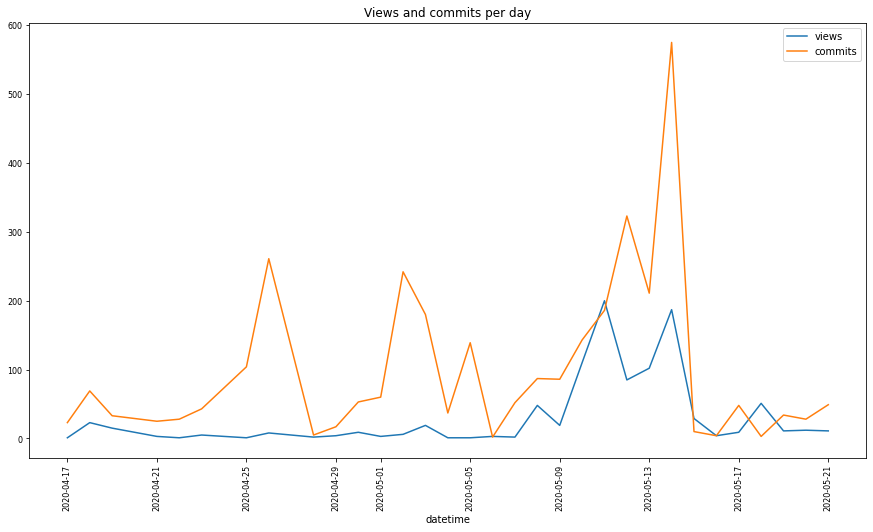

In [19]:
df.plot(fontsize=8,figsize=(15,8),title='Views and commits per day',rot=90)

<h3>close the connection to the database<h3>

In [20]:
db_con.close()

In [21]:
new_pageviews_df.loc[new_pageviews_df.views > 150].count()

views    2
dtype: int64

<h3>How many times was the number of views larger than 150?<h3>

<h3>The answer is 2.<h3>